In [1]:
# 引入Matplotlib引入
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 中文负号
plt.rcParams['axes.unicode_minus'] = False

# 设置分别率 为100
plt.rcParams['figure.dpi'] = 100

# 设置大小
plt.rcParams['figure.figsize'] = (5,3)

# 一. 水平条形图

调用 Matplotlib 的 barh() 函数可以生成水平柱状图。
- barh() 函数的用法与 bar() 函数的用法基本一样，只是在调用 barh() 函数时使用 y参数传入 Y 轴数据，使用 width 参数传入代表条柱宽度的数据。
`plt.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)`

<BarContainer object of 5 artists>

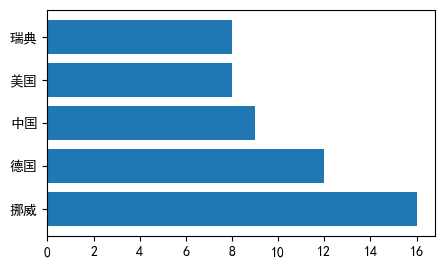

In [3]:
countries = ['挪威', '德国', '中国', '美国', '瑞典']
# 金牌个数
gold_medal = np.array([16, 12, 9, 8, 8])

# y轴为国家,宽度为奖牌数
plt.barh(countries, width=gold_medal)

### 三天中3部电影的票房变化

movie = ['新蝙蝠侠', '狙击手', '奇迹笨小孩']

real_day1 = [4053, 2548, 1543]

real_day2 = [7840, 4013, 2421]

real_day3 = [8080, 3673, 1342]



### 绘制堆叠图
<img src="images/image-20220325093804110.png" style="width:400px"/>

分析:
- 1.确定图形距离左侧的位置
- 2.设置同一宽度
- 3.绘制图形设置left参数
- 4.标注数据

(0.0, 21973.0)

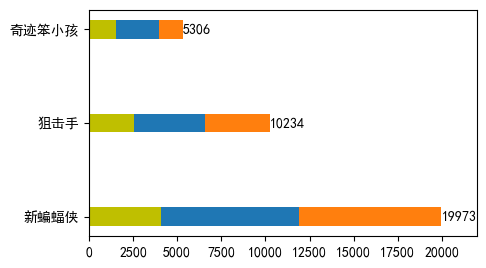

In [4]:
# 由于牵扯计算,因此将数据转numpy数组
movie = ['新蝙蝠侠', '狙击手', '奇迹笨小孩']
# 第一天
real_day1 = np.array( [4053, 2548, 1543])

# 第二天
real_day2 = np.array([7840, 4013, 2421])

# 第三天
real_day3 = np.array([8080, 3673, 1342])

# ================确定距离左侧========

left_day2 = real_day1 # 第二天距离左侧的为第一天的数值

left_day3 = real_day1 + real_day2  # 第三天距离左侧为 第一天+第二天的数据

# 设置线条高度
height = 0.2

# 绘制图形:
plt.barh(movie, real_day1, height=height,color='y')      # 第一天图形

plt.barh(movie, real_day2, left=left_day2, height=height)  # 第二天图形

plt.barh(movie, real_day3, left=left_day3, height=height) # 第三天图形

# 设置数值文本:  计算宽度值和y轴为值

sum_data = real_day1 + real_day2 +real_day3
# horizontalalignment控制文本的x位置参数表示文本边界框的左边，中间或右边。---->ha
# verticalalignment控制文本的y位置参数表示文本边界框的底部，中心或顶部 ---- va
for i in range(len(movie)):
    plt.text(sum_data[i], movie[i], sum_data[i],va="center" , ha="left")
#               X轴宽度         Y轴       X轴总的值
plt.xlim(0,sum_data.max()+2000)

### 绘制同位置多柱状图
<img src="images/image-20220325095042369.png" style="width:400px"/>

分析:

- 1.由于牵扯高度的计算,因此先将y轴转换为数值型
- 2.需要设置同图形的高度
- 3.计算每个图形高度的起始位置
- 4.绘制图形
- 5.替换y轴数据

([<matplotlib.axis.YTick at 0x192ad273f40>,
 [Text(0, 0.2, '新蝙蝠侠'), Text(0, 1.2, '狙击手'), Text(0, 2.2, '奇迹笨小孩')])

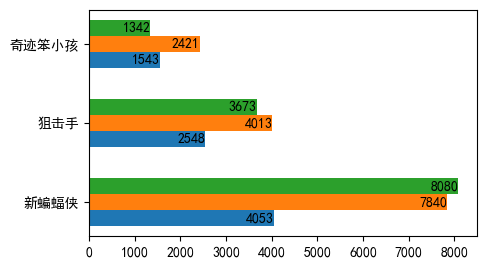

In [5]:
# 由于牵扯计算,因此将数据转numpy数组
movie = ['新蝙蝠侠', '狙击手', '奇迹笨小孩']
# 第一天
real_day1 = np.array( [4053, 2548, 1543])

# 第二天
real_day2 = np.array([7840, 4013, 2421])

# 第三天
real_day3 = np.array([8080, 3673, 1342])


# =================1.y轴转换为数值型======
num_y = np.arange(len(movie))

# ================2.需要设置同图形的高度========
height = 0.2

# ================3.计算每个图形高度的起始位置 ==========
movie1_start_y = num_y               # 第一个电影不变
movie2_start_y = num_y + height      # 第二个电影加上1倍的height
movie3_start_y = num_y + 2 * height  # 第三个电影加上2倍的height


# ================4.绘制图形 ===================

plt.barh(movie1_start_y, real_day1, height=height)      # 第一天图形

plt.barh(movie2_start_y, real_day2,  height=height)  # 第二天图形

plt.barh(movie3_start_y, real_day3, height=height) # 第三天图形

# 设置数值文本:  计算宽度值和y轴为值

for i in range(len(movie)):
    plt.text(real_day1[i], movie1_start_y[i], real_day1[i],va="center" , ha="right")
    plt.text(real_day2[i], movie2_start_y[i], real_day2[i],va="center" , ha="right")
    plt.text(real_day3[i], movie3_start_y[i], real_day3[i],va="center" , ha="right")
# ============5.替换y轴数据
plt.yticks(num_y + height, movie)

# 直方图 plt.hist()

直方图（Histogram），又称质量分布图，它是一种条形图的一种，由一系列高度不等的纵向线段来表示数据分布的情况。 直方图的横轴表示数据类型，纵轴表示分布情况。

首先，我们需要了解柱状图和直方图的区别。直方图用于概率分布，它显示了一组数值序列在给定的数值范围内出现的概率；而柱状图则用于展示各个类别的频数。

<img src="images/image-20220325101728319.png" style="width:400px"/>


|柱状图|直方图|
|:-----------------------------|:-------------------------------------|
|柱状图一般用于描述离散型分类数据的对比       |直方图一般用于描述连续型数据的分布关系|
|每根柱子宽度固定，柱子之间会有间距          |每根柱子宽度可以不一样，且一般没有间距|
|横轴变量可以任意排序                   |横轴变量有一定顺序规则|

将统计值的范围分段，即将整个值的范围分成一系列间隔，然后计算每个间隔中有多少值。
直方图也可以被归一化以显示“相对”频率。 然后，它显示了属于几个类别中的每个类别的占比，其高度总和等于1。

`plt.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)`

- x: 作直方图所要用的数据，必须是一维数组；多维数组可以先进行扁平化再作图；必选参数；
- bins: 直方图的柱数，即要分的组数，默认为10；
- weights：与x形状相同的权重数组；将x中的每个元素乘以对应权重值再计数；如果normed或density取值为True，则会对权重进行归一化处理。这个参数可用于绘制已合并的数据的直方图；
- density：布尔,可选。如果"True"，返回元组的第一个元素将会将计数标准化以形成一个概率密度，也就是说，直方图下的面积（或积分）总和为1。这是通过将计数除以数字的数量来实现的观察乘以箱子的宽度而不是除以总数数量的观察。如果叠加也是“真实”的，那么柱状图被规范化为1。(替代normed)
- bottom：数组，标量值或None；每个柱子底部相对于y=0的位置。如果是标量值，则每个柱子相对于y=0向上/向下的偏移量相同。如果是数组，则根据数组元素取值移动对应的柱子；即直方图上下便宜距离；
- histtype：{‘bar’, ‘barstacked’, ‘step’, ‘stepfilled’}；'bar’是传统的条形直方图；'barstacked’是堆叠的条形直方图；'step’是未填充的条形直方图，只有外边框；‘stepfilled’是有填充的直方图；当histtype取值为’step’或’stepfilled’，rwidth设置失效，即不能指定柱子之间的间隔，默认连接在一起；
- align：{‘left’, ‘mid’, ‘right’}；‘left’：柱子的中心位于bins的左边缘；‘mid’：柱子位于bins左右边缘之间；‘right’：柱子的中心位于bins的右边缘；
- color：具体颜色，数组（元素为颜色）或None。
- label：字符串（序列）或None；有多个数据集时，用label参数做标注区分；
- normed: 是否将得到的直方图向量归一化，即显示占比，默认为0，不归一化；不推荐使用，建议改用density参数；
- edgecolor: 直方图边框颜色；
- alpha: 透明度；

In [6]:
# 使用numpy随机生成300个随机数据
x_value = np.random.randint(140,180,300)

Text(0, 0.5, '比率')

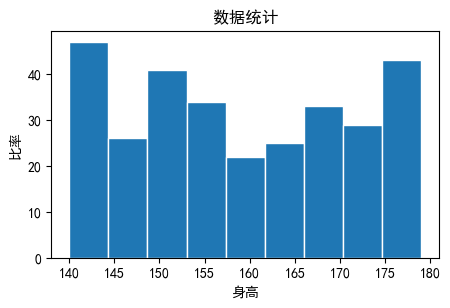

In [7]:
plt.hist(x_value, bins=9, edgecolor='white')
#plt.hist(x_value, bins=20, edgecolor='white')
plt.title("数据统计")
plt.xlabel("身高")
plt.ylabel("比率")

## 返回值

- n : 数组或数组列表
 - 直方图的值
- bins : 数组
 - 返回各个bin的区间范围
- patches : 列表的列表或列表
 -返回每个bin里面包含的数据，是一个list

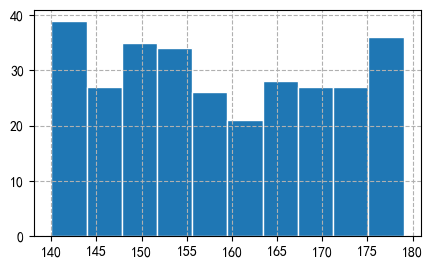

In [8]:
num,bins_limit,patches = plt.hist(x_value, bins=10, edgecolor='white')
plt.grid(ls="--")

In [9]:
num

array([39., 27., 35., 34., 26., 21., 28., 27., 27., 36.])

In [10]:
bins_limit

array([140. , 143.9, 147.8, 151.7, 155.6, 159.5, 163.4, 167.3, 171.2,
       175.1, 179. ])

In [11]:
for i in patches:
    print(i)
    print(i.get_x())
    print(i.get_y())
    print(i.get_height())
    print(i.get_width())

Rectangle(xy=(140, 0), width=3.9, height=39, angle=0)
140.0
0.0
39.0
3.9000000000000057
Rectangle(xy=(143.9, 0), width=3.9, height=27, angle=0)
143.90000000000003
0.0
27.0
3.9000000000000057
Rectangle(xy=(147.8, 0), width=3.9, height=35, angle=0)
147.8
0.0
35.0
3.8999999999999773
Rectangle(xy=(151.7, 0), width=3.9, height=34, angle=0)
151.7
0.0
34.0
3.9000000000000057
Rectangle(xy=(155.6, 0), width=3.9, height=26, angle=0)
155.60000000000002
0.0
26.0
3.9000000000000057
Rectangle(xy=(159.5, 0), width=3.9, height=21, angle=0)
159.5
0.0
21.0
3.9000000000000057
Rectangle(xy=(163.4, 0), width=3.9, height=28, angle=0)
163.40000000000003
0.0
28.0
3.9000000000000057
Rectangle(xy=(167.3, 0), width=3.9, height=27, angle=0)
167.3
0.0
27.0
3.8999999999999773
Rectangle(xy=(171.2, 0), width=3.9, height=27, angle=0)
171.2
0.0
27.0
3.9000000000000057
Rectangle(xy=(175.1, 0), width=3.9, height=36, angle=0)
175.10000000000002
0.0
36.0
3.9000000000000057


In [12]:
patches[0].get_width()

3.9000000000000057

n 是分组区间对应的频率： [39. 27. 35. 34. 26. 21. 28. 27. 27. 36.]

bins_limit 是分组时的分隔值： [140.  143.9 147.8 151.7 155.6 159.5 163.4 167.3 171.2 175.1 179. ]

patches 指的是是直方图中列表对象 <class 'matplotlib.container.BarContainer'>



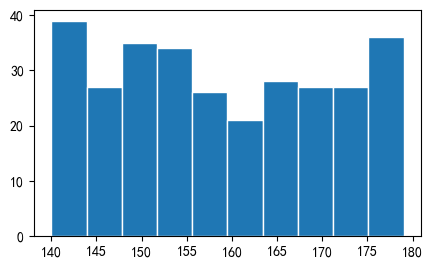

Rectangle(xy=(140, 0), width=3.9, height=39, angle=0)
Rectangle(xy=(143.9, 0), width=3.9, height=27, angle=0)
Rectangle(xy=(147.8, 0), width=3.9, height=35, angle=0)
Rectangle(xy=(151.7, 0), width=3.9, height=34, angle=0)
Rectangle(xy=(155.6, 0), width=3.9, height=26, angle=0)
Rectangle(xy=(159.5, 0), width=3.9, height=21, angle=0)
Rectangle(xy=(163.4, 0), width=3.9, height=28, angle=0)
Rectangle(xy=(167.3, 0), width=3.9, height=27, angle=0)
Rectangle(xy=(171.2, 0), width=3.9, height=27, angle=0)
Rectangle(xy=(175.1, 0), width=3.9, height=36, angle=0)
[140.0, 143.90000000000003, 147.8, 151.7, 155.60000000000002, 159.5, 163.40000000000003, 167.3, 171.2, 175.10000000000002]
[39.0, 27.0, 35.0, 34.0, 26.0, 21.0, 28.0, 27.0, 27.0, 36.0]


In [13]:
# 绘制直方图返回元组,元组中有三个元素
num,bins_limit,patches = plt.hist(x_value, bins=10, edgecolor='white')
print("n 是分组区间对应的频率：",num,end="\n\n")
print("bins_limit 是分组时的分隔值：",bins_limit,end="\n\n")
print("patches 指的是是直方图中列表对象",type(patches),end="\n\n")
#plt.xticks(bins_limit)  
plt.show()
x_limit_value = []
height_value = []
for item in patches:
    print(item)
    x_limit_value.append(item.get_x())
    height_value.append(item.get_height())

print(x_limit_value)
print(height_value)


- xy：xy位置（x取值bins_limits 是分组时的分隔值，y取值都是0开始）
- width ：宽度为各个bin的区间范围（bins_limits 是分组时的分隔值）
- height ：高度也就是密度值（n 是分组区间对应的频率）
- angle：角度

### 添加折线直方图

在直方图中，我们也可以加一个折线图，辅助我们查看数据变化情况

- 首先通过pyplot.subplots()创建Axes对象

- 通过Axes对象调用hist()方法绘制直方图，返回折线图所需要的下x,y数据

- 然后Axes对象调用plot()绘制折线图

- 我们对第一节代码进行改造一下


[140.  143.9 147.8 151.7 155.6 159.5 163.4 167.3 171.2 175.1]


([<matplotlib.axis.XTick at 0x192ad3e9ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

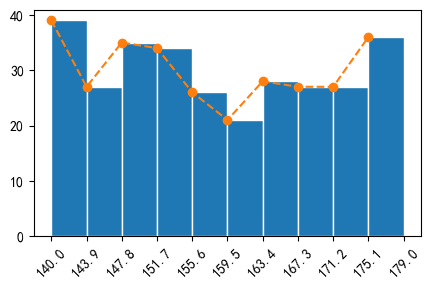

In [14]:
# 创建一个画布
fig, ax = plt.subplots()

# 绘制直方图
num,bins_limit,patches = ax.hist(x_value, bins=10, edgecolor='white')

# 注意num返回的个数是10,bins_limit返回的个数为11,需要截取
print(bins_limit[:-1])
# 曲线图
ax.plot(bins_limit[:10], num, '--',marker="o")
#ax.set_xticks(bins_limit)
# 需要单独设置x轴的旋转
plt.xticks(bins_limit,rotation=45)

##  不等距分组
面的直方图都是等距的，但有时我们需要得到不等距的直方图，这个时候只需要确定分组上下限，并指定 histtype="bar" 就可以

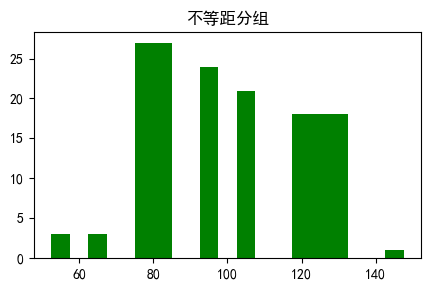

In [15]:

fig, ax = plt.subplots()
x = np.random.normal(100,20,100) # 均值和标准差
bins = [50, 60, 70, 90, 100,110, 140, 150]
ax.hist(x, bins, color="g",rwidth=0.5)
ax.set_title('不等距分组')
plt.show()

### 多类型直方图

我们在使用直方图查查看数据的频率时，有时候会查看多种类型数据出现的频率。

- 这时候我们可以以列表的形式传入多种数据给hist()方法的x数据

[array([ 2.40340132, -1.59901006,  1.25698026, ..., -1.93550182,
       -0.62449799, -0.06677167]), array([-0.17606731, -0.20957162,  1.02865424, ..., -0.08269376,
        1.48571906,  0.90473828]), array([-1.20840592, -1.03198285, -0.66145704, ..., -2.34645511,
        0.64283817,  0.12233443])]


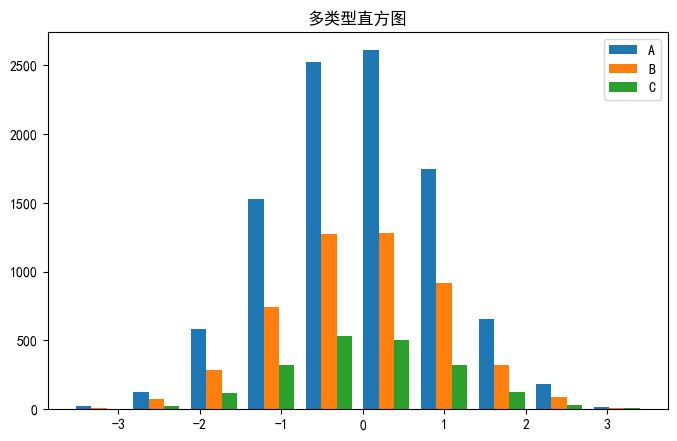

In [16]:
# 指定分组个数
n_bins=10

fig,ax=plt.subplots(figsize=(8,5))

# 分别生成10000 ， 5000 ， 2000 个值
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
print(x_multi)

# 实际绘图代码与单类型直方图差异不大，只是增加了一个图例项
# 在 ax.hist 函数中先指定图例 label 名称
ax.hist(x_multi, n_bins, histtype='bar',label=list("ABC"))

ax.set_title('多类型直方图')

# 通过 ax.legend 函数来添加图例
ax.legend()


### 堆叠直方图

我们有时候会对吧同样数据范围情况下，对比两组不同对象群体收集的数据差异

准备两组数据：

In [17]:
x_value = np.random.randint(140,180,200)
x2_value = np.random.randint(140,180,200)

- 直方图属性data：以列表的形式传入两组数据

- 设置直方图stacked:为True，允许数据覆盖

(array([[17., 30., 35., 14., 14., 16., 22., 19., 22., 11.],
        [30., 56., 56., 31., 35., 41., 37., 42., 41., 31.]]),
 array([140. , 143.9, 147.8, 151.7, 155.6, 159.5, 163.4, 167.3, 171.2,
        175.1, 179. ]),
 <a list of 2 BarContainer objects>)

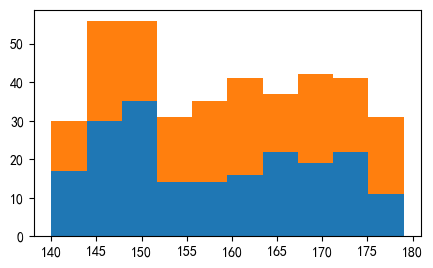

In [18]:
#plt.hist([x_value,x2_value],bins=10,stacked=True)
plt.hist([x_value,x2_value],bins=10, stacked=True)

# 饼状图 pie()

饼状图用来显示一个数据系列，具体来说，饼状图显示一个数据系列中各项目的占项目总和的百分比。

Matplotlib 提供了一个 pie() 函数，该函数可以生成数组中数据的饼状图。您可使用 x/sum(x) 来计算各个扇形区域占饼图总和的百分比。pie() 函数的参数说明如下：

`pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None)`
- x:  数组序列，数组元素对应扇形区域的数量大小。
- labels: 列表字符串序列，为每个扇形区域备注一个标签名字。
- colors; 为每个扇形区域设置颜色，默认按照颜色周期自动设置。
- autopct: 格式化字符串"fmt%pct"，使用百分比的格式设置每个扇形区的标签，并将其放置在扇形区内。
- pctdistance：设置百分比标签与圆心的距离；
- labeldistance：设置各扇形标签（图例）与圆心的距离；
- explode: 指定饼图某些部分的突出显示，即呈现爆炸式；()
- shadow：是否添加饼图的阴影效果

<img src="images/image-202203291117121.png"/>

([<matplotlib.patches.Wedge at 0x192ad612eb0>,
 [Text(1.0978294013681003, 0.06906956994045162, '娱乐'),
  Text(1.056323054388303, 0.3068902161486517, '育儿'),
  Text(0.7530018217768821, 0.8018654852284746, '饮食'),
  Text(-1.065441491584454, -0.2735588200191946, '房贷'),
  Text(0.8899186347901604, -0.6465638587589142, '交通'),
  Text(1.056323029246806, -0.30689030268623974, '其它')])

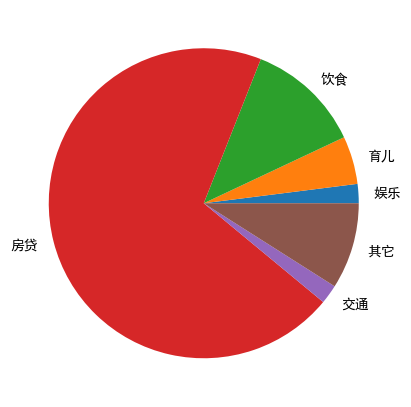

In [19]:
# 设置大小
plt.rcParams['figure.figsize'] = (5,7)



#定义饼的标签，
labels = ['娱乐','育儿','饮食','房贷','交通','其它']

#每个标签所占的数量
x = [200,500,1200,7000,200,900]

#绘制饼图
plt.pie(x,labels=labels)

### 百分比显示 percentage
`autopct` 

([<matplotlib.patches.Wedge at 0x192ad677160>,
 [Text(1.0978294013681003, 0.06906956994045162, '娱乐'),
  Text(1.056323054388303, 0.3068902161486517, '育儿'),
  Text(0.7530018217768821, 0.8018654852284746, '饮食'),
  Text(-1.065441491584454, -0.2735588200191946, '房贷'),
  Text(0.8899186347901604, -0.6465638587589142, '交通'),
  Text(1.056323029246806, -0.30689030268623974, '其它')],
 [Text(0.5988160371098727, 0.03767431087660997, '2.00%'),
  Text(0.5761762114845289, 0.16739466335380998, '5.00%'),
  Text(0.4107282664237538, 0.43738117376098606, '12.00%'),
  Text(-0.5811499045006112, -0.1492139018286516, '70.00%'),
  Text(0.48541016443099655, -0.3526711956866804, '2.00%'),
  Text(0.5761761977709849, -0.16739471055613073, '9.00%')])

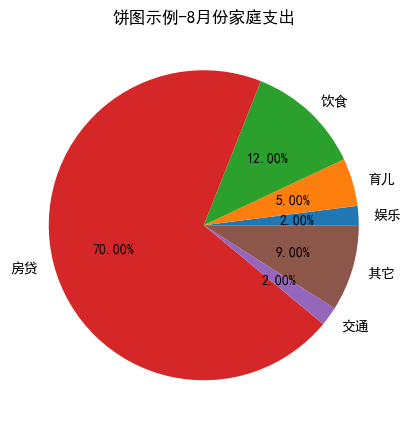

In [20]:
#定义饼的标签，
labels = ['娱乐','育儿','饮食','房贷','交通','其它']

#每个标签所占的数量
x = [200,500,1200,7000,200,900]

plt.title("饼图示例-8月份家庭支出")

#%.2f%%显示百分比,保留2位小数
plt.pie(x,labels=labels,autopct='%.2f%%')


### 饼状图的分离

`explode`: 指定饼图某些部分的突出显示



([<matplotlib.patches.Wedge at 0x192ad6dd490>,
 [Text(1.127770203223594, 0.07095328548428212, '娱乐'),
  Text(1.1043377386786806, 0.32083977142813586, '育儿'),
  Text(0.7940746484192576, 0.8456036026045731, '饮食'),
  Text(-1.1041848185511614, -0.28350641347443806, '房贷'),
  Text(0.9546399900476267, -0.6935866848504716, '交通'),
  Text(1.2579846984666507, -0.36547845138088547, '其它')],
 [Text(0.6287568389653664, 0.03955802642044046, '2.00%'),
  Text(0.6241908957749063, 0.18134421863329414, '5.00%'),
  Text(0.4518010930661292, 0.4811192911370847, '12.00%'),
  Text(-0.6198932314673187, -0.15916149528389503, '70.00%'),
  Text(0.5501315196884627, -0.3996940217782378, '2.00%'),
  Text(0.7778378669908297, -0.2259828592507765, '9.00%')])

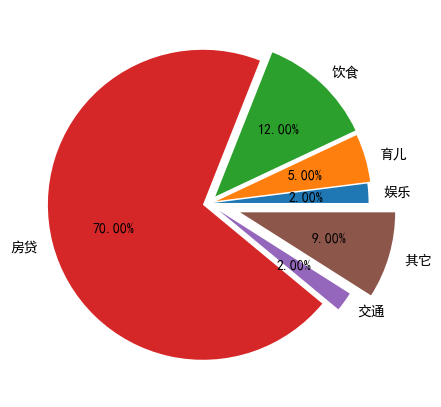

In [21]:
#定义饼的标签，
labels = ['娱乐','育儿','饮食','房贷','交通','其它']

#每个标签所占的数量
x = [200,500,1200,7000,200,900]

#饼图分离
explode = (0.03,0.05,0.06,0.04,0.08,0.21)

#设置阴影效果
plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode)

## 设置饼状图百分比和文本距离中心位置:

- pctdistance：设置百分比标签与圆心的距离；
- labeldistance：设置各扇形标签（图例）与圆心的距离；
    

([<matplotlib.patches.Wedge at 0x192ae89e790>,
 [Text(1.3772768853527075, 0.08665091501620294, '娱乐'),
  Text(1.3444111601305677, 0.39058754782555666, '育儿'),
  Text(0.9652114260958216, 1.0278457583383174, '饮食'),
  Text(-1.3463306120930827, -0.3456788725697096, '房贷'),
  Text(1.1568942252272085, -0.8405330163865885, '交通'),
  Text(1.3924258112798804, -0.40453721717731594, '其它')],
 [Text(1.2275728760752391, 0.07723233729705044, '2.00%'),
  Text(1.2003671072594353, 0.3487388819871041, '5.00%'),
  Text(0.8625293594898831, 0.9185004648980707, '12.00%'),
  Text(-1.2010431359679299, -0.30837539711254663, '70.00%'),
  Text(1.0355416841194593, -0.7523652174649182, '2.00%'),
  Text(1.248381761837134, -0.36268853953828323, '9.00%')])

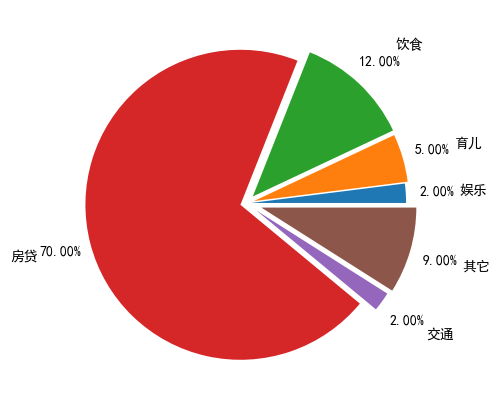

In [22]:
#定义饼的标签，
labels = ['娱乐','育儿','饮食','房贷','交通','其它']

#每个标签所占的数量
x = [200,500,1200,7000,200,900]

#饼图分离
explode = (0.03,0.05,0.06,0.04,0.08,0.1)

#设置阴影效果
#plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode,shadow=True)

plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode, labeldistance=1.35, pctdistance=1.2)

## 图例


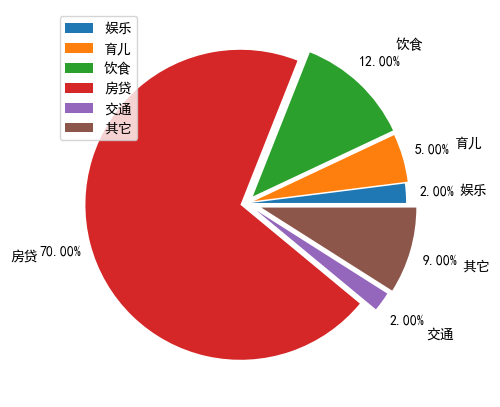

In [23]:
#定义饼的标签，
labels = ['娱乐','育儿','饮食','房贷','交通','其它']

#每个标签所占的数量
x = [200,500,1200,7000,200,900]

#饼图分离
explode = (0.03,0.05,0.06,0.04,0.08,0.1)

#设置阴影效果
#plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode,shadow=True)

plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode, labeldistance=1.35, pctdistance=1.2)
plt.legend()

## 设置x,y的刻度一样，使其饼图为正圆 
plt.axis('equal')

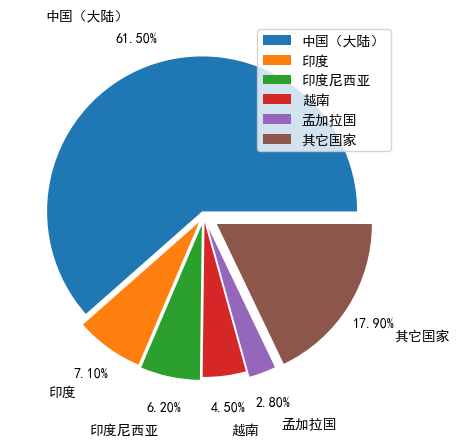

In [25]:
#定义饼的标签，
labels = ['中国（大陆）','印度','印度尼西亚','越南','孟加拉国','其它国家']

#每个标签所占的数量
x = [61.50,7.10,6.20,4.50,2.80,17.90]

#饼图分离
explode = (0.03,0.05,0.06,0.04,0.08,0.1)

#设置阴影效果
#plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode,shadow=True)

plt.pie(x,labels=labels,autopct='%3.2f%%',explode=explode, labeldistance=1.35, pctdistance=1.2)
plt.savefig("my/my_pie.png")
plt.legend()